### Similitud de Vectores
#### Calcular similud de variables
- Distancia Euclidiana
d(p,q)^2 = (q1-p1)^2 + (q2-p2)^2
- Angulo entre vectores
cos 0 = 1

- En el procesamiento del lenguaje natural, a menudo se prefieree la similitud del coseno porque toma en cuenta el angulo entre los vectores, que puede ser mas relevante en contextos donde los vectores representan textos o palabras

### TF-IDF
- Term Frequency (TF) e Inverse Documente Frenquency. reduce el peso de las palabras comunes y aumenta el peso de las palabras que no se utilizan con frecuencia

- eliminar las stop words puede hacer que los algoritmos sean mas precisos y rapidos, ya que hay menos palabras a procesar

#### Descripción
- TF-IDF funciona al asignar un puntaje a cada pàlabra en un documento en funcion de su frecuencia en ese documento (TF) y su frecuencia en todos los documentos (IDF)

- Cuanto mas a menudo aparece una palabra en un solo documento, pero menos a menudo en todos los documentos, mayou es su puntaje TF-IDF

- Las palabras que aparecen con mas frecuencia en un documento peroo raramente en otros documentos son mas importantes

### FORMULA
- TF-IDF se calcula multiplicando dos componentes: TF e IDF
- Tf se calcula como el numero de veces que aparece una palabra en un documento dividido por el total de palabras del documento
- IDF se calcula como el  logaritmo del total de documentos dividido por el numero de documentos que contienen la palabra

- TF-IDF = TF(t,d) * IDF(t,D)
- TF(t,d) = Numero de veces que el termino t aparece en el documento d / total de terminos en el documento d
-IDF(t,D) = log_e(total de documentos en el corpus D / Numero de documentos dodne el termino t aparece)

In [3]:
# librerías
import pandas as pd
import numpy as np

df = pd.read_csv(r'C:/Users/ander/Escritorio/PYTHON/Python 2025/Procesamiento_lenguaje_natural_NLP/datasets/movie_metadata.csv', sep=',', encoding='utf-8')
df.head()


,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [2]:
df.isnull().sum()

color                         19
director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          21
language                      14
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64

In [4]:
# creando un columna id y en primera posición
df.insert(0, 'id', range(1,1+len(df)))

In [6]:
df.tail(3)

,id,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
5040,5041,Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,NaN,...,3.0,English,USA,NaN,1400.0,2013.0,0.0,6.3,NaN,16
5041,5042,Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,10443.0,...,9.0,English,USA,PG-13,NaN,2012.0,719.0,6.3,2.35,660
5042,5043,Color,Jon Gunn,43.0,90.0,16.0,16.0,Brian Herzlinger,86.0,85222.0,...,84.0,English,USA,PG,1100.0,2004.0,23.0,6.6,1.85,456


In [7]:
df.columns

Index(['id', 'color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

In [10]:
# columans ordenadas
col_ordenado = ['id', 'movie_title', 'genres','plot_keywords']
col_rest = [col for col in df.columns if col not in col_ordenado]
col_fin = col_ordenado + col_rest
df = df[col_fin]
df.head(3)

,id,movie_title,genres,plot_keywords,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,1,Avatar,Action|Adventure|Fantasy|Sci-Fi,avatar|future|marine|native|paraplegic,Color,James Cameron,723.0,178.0,0.0,855.0,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,2,Pirates of the Caribbean: At World's End,Action|Adventure|Fantasy,goddess|marriage ceremony|marriage proposal|pi...,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,3,Spectre,Action|Adventure|Thriller,bomb|espionage|sequel|spy|terrorist,Color,Sam Mendes,602.0,148.0,0.0,161.0,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000


In [11]:
# reemplazar | por espacio
df['genres'] = df['genres'].str.replace('|', ' ')
df['plot_keywords'] = df['plot_keywords'].str.replace('|', ' ')
df.head(3)

,id,movie_title,genres,plot_keywords,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,1,Avatar,Action Adventure Fantasy Sci-Fi,avatar future marine native paraplegic,Color,James Cameron,723.0,178.0,0.0,855.0,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,2,Pirates of the Caribbean: At World's End,Action Adventure Fantasy,goddess marriage ceremony marriage proposal pi...,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,3,Spectre,Action Adventure Thriller,bomb espionage sequel spy terrorist,Color,Sam Mendes,602.0,148.0,0.0,161.0,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000


In [12]:
# crear columna de texto para genres y plot_keywords
df['texto'] = df[['genres' , 'plot_keywords']].apply(lambda row: ' '.join(row.values.astype(str)), axis=1)
df.head(3)

,id,movie_title,genres,plot_keywords,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,...,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,texto
0,1,Avatar,Action Adventure Fantasy Sci-Fi,avatar future marine native paraplegic,Color,James Cameron,723.0,178.0,0.0,855.0,...,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,Action Adventure Fantasy Sci-Fi avatar future ...
1,2,Pirates of the Caribbean: At World's End,Action Adventure Fantasy,goddess marriage ceremony marriage proposal pi...,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,...,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,Action Adventure Fantasy goddess marriage cere...
2,3,Spectre,Action Adventure Thriller,bomb espionage sequel spy terrorist,Color,Sam Mendes,602.0,148.0,0.0,161.0,...,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000,Action Adventure Thriller bomb espionage seque...


In [15]:
# seleleccionando la primera fila
row = df[['texto']].iloc[0]
row

texto    Action Adventure Fantasy Sci-Fi avatar future ...
Name: 0, dtype: object

In [17]:
# importandon las librerias para TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances
# instanciando el vectorizador
tf_idf = TfidfVectorizer(max_features=2000)
X = tf_idf.fit_transform(df['texto'])
X


<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 44000 stored elements and shape (5043, 2000)>

In [24]:
peliculas = pd.Series(df.index, index=df['movie_title']).drop_duplicates()
peliculas

movie_title
Avatar                                                        0
Pirates of the Caribbean: At World's End                      1
Spectre                                                       2
The Dark Knight Rises                                         3
Star Wars: Episode VII - The Force Awakens                    4
                                                           ... 
Signed Sealed Delivered                                    5038
The Following                                              5039
A Plague So Pleasant                                       5040
Shanghai Calling                                           5041
My Date with Drew                                          5042
Length: 5043, dtype: int64

In [25]:
# eliminar espacios en blanco 
peliculas.index = peliculas.index.str.strip()
peliculas

movie_title
Avatar                                           0
Pirates of the Caribbean: At World's End         1
Spectre                                          2
The Dark Knight Rises                            3
Star Wars: Episode VII - The Force Awakens       4
                                              ... 
Signed Sealed Delivered                       5038
The Following                                 5039
A Plague So Pleasant                          5040
Shanghai Calling                              5041
My Date with Drew                             5042
Length: 5043, dtype: int64

In [47]:
indice = peliculas['The Dark Knight Rises']
indice

np.int64(3)

In [48]:
# consulta 
consulta = X[indice]
consulta

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 8 stored elements and shape (1, 2000)>

In [49]:
print(consulta)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 8 stored elements and shape (1, 2000)>
  Coords	Values
  (0, 32)	0.14997860517223982
  (0, 1797)	0.1379495887811173
  (0, 1782)	0.3445459446502384
  (0, 478)	0.46014136234826947
  (0, 886)	0.48056667678675813
  (0, 1356)	0.26474173139625884
  (0, 1245)	0.3738571275391204
  (0, 1349)	0.4327039179793776


In [50]:
# convertir a array
consulta.toarray()

array([[0., 0., 0., ..., 0., 0., 0.]], shape=(1, 2000))

In [51]:
# calcular similitud
similitud = cosine_similarity(consulta, X)
similitud

array([[0.02767798, 0.02180518, 0.18356101, ..., 0.05069847, 0.        ,
        0.        ]], shape=(1, 5043))

In [52]:
similitud[0][2]

np.float64(0.1835610107611357)

In [53]:
# transformando en un array
similitud = similitud.flatten()
similitud[2]

np.float64(0.1835610107611357)

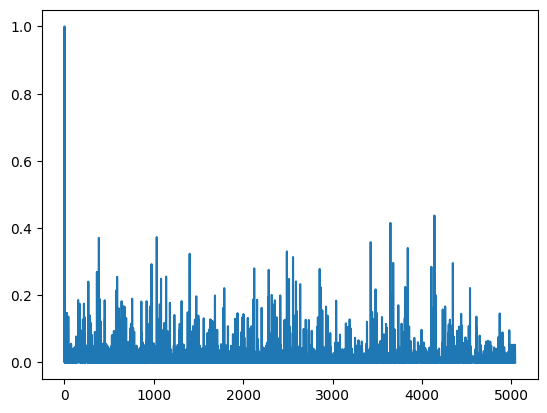

In [54]:
# graficando la similitudes
import matplotlib.pyplot as plt
plt.plot(similitud)

In [55]:
# ordenamiento de similitud
(-similitud).argsort()

array([   3, 4139, 3647, ..., 2380, 2363, 5042], shape=(5043,))

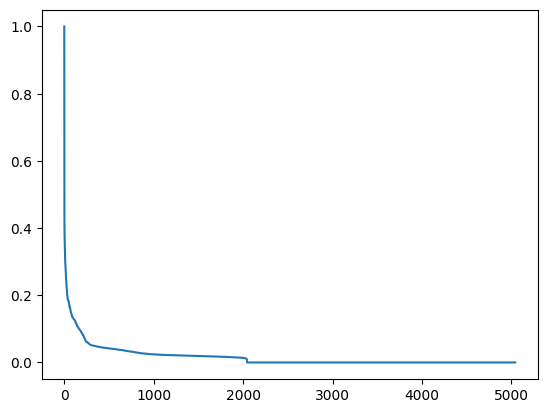

In [56]:
# grafica de similitud de mayor-menor
plt.plot(similitud[(-similitud).argsort()])

In [57]:
# recomendacion para las peliculas 10 mas parecidas al caballero de la noche
recomendacion = (-similitud).argsort()[1:11]
df['movie_title'].iloc[recomendacion]

4139            AWOL-72 
3647           Deadfall 
1034            The One 
387     The Devil's Own 
3426            Swelter 
3841     Police Academy 
2489      Let's Be Cops 
1402    Lethal Weapon 3 
2558           Hot Fuzz 
3678     Mambo Italiano 
Name: movie_title, dtype: object